<a href="https://colab.research.google.com/github/codekennML/CarPricePrediction/blob/main/Predicting_the_sale_value_of_a_car_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The essence  of this project is to detect ......

First , Importing the libraries 

In [ ]:
import numpy as np                   #Numpy is used for array manipulation
import pandas as pd                  #Dataframe manipulation
import seaborn as sns                #Visualization
import matplotlib.pyplot as plt      #Visualization
%matplotlib inline                  


Lets go grab our data located at Kaggle and load into the pandas dataframe

In [ ]:

'''' 
Dataset href = https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner
'''
pd.set_option('display.max_columns', None)
df =  pd.read_csv('/content/car data.csv')


In [ ]:
df.shape

(301, 9)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_categorical  =  df.select_dtypes(include= 'object')


In [ ]:
df_categorical.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [ ]:

df_categorical['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:

df_categorical['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:

df_categorical['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
uniq  =  [feature for feature in df_categorical.columns if feature != 'Car_Name' ]

for feature in uniq:
  print(df_categorical[feature].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [ ]:
#There are no null values in the dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#Handling temporal variables 
#The datetime variable (Year) is a temporal variable and thus we can create a derived feature tahhed number of years
Year =  2020
df['Age'] = Year - df['Year']
df['Age']

0       6
1       7
2       3
3       9
4       6
       ..
296     4
297     5
298    11
299     3
300     4
Name: Age, Length: 301, dtype: int64

In [ ]:
# It would be wise to drop the car name column considering that since we seek to 
# Know the price of a car i.e our target variable, the car name should not necessarily be known
df.drop(columns=['Car_Name','Year'], axis = 1, inplace= True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [ ]:
#Encoding the categorical variables using pd.get_ummies and dropping the original categorical columns

final_dataset =  pd.get_dummies(df, drop_first=True)


In [ ]:
final_dataset.shape

(301, 9)

In [ ]:
#finding the correlatiomn
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


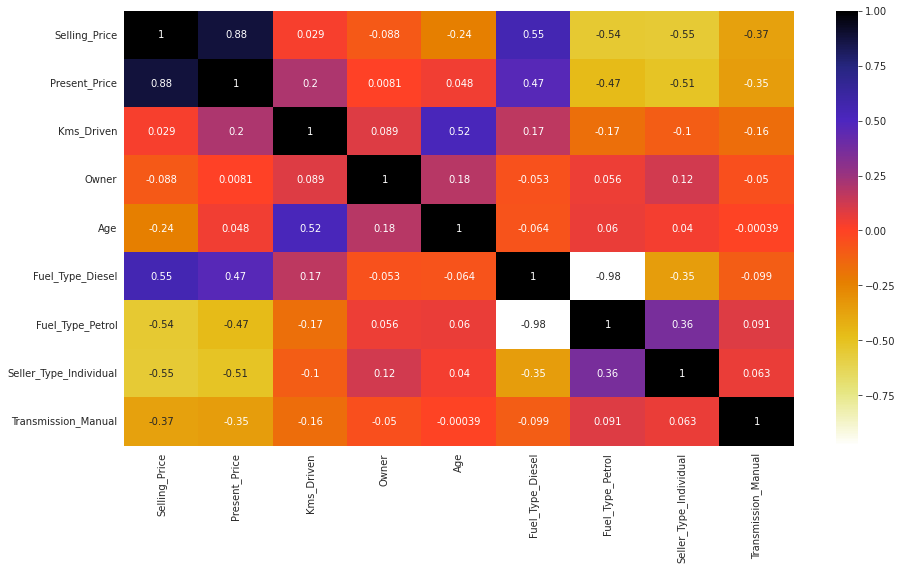

In [ ]:
#visualize seaborn 
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,8))
corr =  final_dataset.corr()
sns.heatmap(corr, annot = True, cmap ='CMRmap_r')

In [ ]:
#Selling Price and Present price have a correlation above 80%
#However, lets just deploy 
#Split the dataset into train and test 

x = final_dataset.drop(columns=['Selling_Price'])
y = final_dataset['Selling_Price']


In [ ]:
#Obtain the relative importance of each feature usimg extratreeregressor
from sklearn.ensemble import ExtraTreesRegressor
model =  ExtraTreesRegressor()
model.fit(x,y)


ExtraTreesRegressor()

In [ ]:
#print the relative importance 
print(model.feature_importances_)

[0.38772922 0.03929596 0.00048007 0.07855685 0.22124327 0.01261868
 0.12926674 0.13080923]


In [ ]:
from sklearn.model_selection import train_test_split

#x_train,y_train,x_test,y_test = train_test_split(x,y,test_size = 0.3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)





(210, 8)
(210,)


In [ ]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=x.columns) 
feat_importances.nlargest(5).plot(kind='barh').plt.show()

In [ ]:
#For the regressor , we need to do hyper parameter tuning to get the best vlues for its options 
#The random foret regressor has a few params namely n_estimator, max_depth etc 

#lets do a randomised search for the best parameters using randomizedsearchcv

n_estimators =  [int(x) for x in np.linspace(100,1200,12)]
#No of features to be considered at each split 
max_features = ['auto', 'sqrt']
#max numbers of levels in a tree
max_depth =  [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf =  [1,2,5,10]





In [ ]:
#Random search CV

from sklearn.model_selection import RandomizedSearchCV

random_grid =  {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor()
rf_random =  RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error' ,verbose =2, n_iter=10, cv= 5, n_jobs =1 )
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [ ]:
predictions = rf_random.predict(x_test)

In [ ]:
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7812774942551891
MSE: 2.6498859743794902
RMSE: 1.6278470365422821


In [ ]:
import pickle
file =  open('Random_Forest_Regressor.pkl', 'wb')
pickle.dump(rf_random , file)

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
app = Flask(__name__)
model = pickle.load(open('/content/Random_Forest_Regressor.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')


standard_to = StandardScaler()
@app.route("/predict", methods=['POST'])
def predict():
    Fuel_Type_Diesel=0
    if request.method == 'POST':
        Year = int(request.form['Year'])
        Present_Price=float(request.form['Present_Price'])
        Kms_Driven=int(request.form['Kms_Driven'])
        Kms_Driven2=np.log(Kms_Driven)
        Owner=int(request.form['Owner'])
        Fuel_Type_Petrol=request.form['Fuel_Type_Petrol']
        if(Fuel_Type_Petrol=='Petrol'):
                Fuel_Type_Petrol=1
                Fuel_Type_Diesel=0
        else:
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=1
        Year=2020-Year
        Seller_Type_Individual=request.form['Seller_Type_Individual']
        if(Seller_Type_Individual=='Individual'):
            Seller_Type_Individual=1
        else:
            Seller_Type_Individual=0	
        Transmission_Mannual=request.form['Transmission_Mannual']
        if(Transmission_Mannual=='Mannual'):
            Transmission_Mannual=1
        else:
            Transmission_Mannual=0
        prediction=model.predict([[Present_Price,Kms_Driven2,Owner,Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Mannual]])
        output=round(prediction[0],2)
        if output<0:
            return render_template('index.html',prediction_texts="Sorry you cannot sell this car")
        else:
            return render_template('index.html',prediction_text="You Can Sell The Car at {}".format(output))
    else:
        return render_template('index.html')

if __name__=="__main__":
    app.run(debug=True)
